# MENG 37100
# Problem Set 7 - Cooper pair box and cats
# Rachel Dey

In [1]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
from qutip.measurement import measure, measurement_statistics
from qutip.qip.operations import snot
from qutip.qip.operations import rx
from qutip.qip.operations import ry
from qutip.qip.operations import rz
from scipy.optimize import curve_fit
import datetime
import qutip.control.pulseoptim as cpo
from qutip.qip.operations import cnot
import matplotlib as mpl
from matplotlib import cm
from math import *

## Problem 1 - The Cooper Pair Box

### 1a) 

In [2]:
def n_op(N_c):
    nhat = 0
    for i in range(-N_c,N_c+1):
        v = basis(2*N_c+1,N_c+i)
        nhat += i*v*v.dag()
    return nhat
n_op(4)

Quantum object: dims = [[9], [9]], shape = (9, 9), type = oper, isherm = True
Qobj data =
[[-4.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -3.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -2.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  2.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  3.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  4.]]

### 1b) 

In [3]:
def electrostatic(E_c,n_g,N_c):
    H = 4*E_c*(n_op(N_c)-n_g*qeye(2*N_c+1))**2
    return H
electrostatic(20,5,3)

Quantum object: dims = [[7], [7]], shape = (7, 7), type = oper, isherm = True
Qobj data =
[[5120.    0.    0.    0.    0.    0.    0.]
 [   0. 3920.    0.    0.    0.    0.    0.]
 [   0.    0. 2880.    0.    0.    0.    0.]
 [   0.    0.    0. 2000.    0.    0.    0.]
 [   0.    0.    0.    0. 1280.    0.    0.]
 [   0.    0.    0.    0.    0.  720.    0.]
 [   0.    0.    0.    0.    0.    0.  320.]]

### 1c) 

In [4]:
def josephson(E_j,N_c):
    coupling = 0
    for i in range(-N_c,N_c):
        n = basis(2*N_c+1,N_c+i)
        nplus1 = basis(2*N_c+1,N_c+i+1)
        coupling+=nplus1*n.dag()+n*nplus1.dag()
    return -E_j/2*coupling
josephson(20,3)

Quantum object: dims = [[7], [7]], shape = (7, 7), type = oper, isherm = True
Qobj data =
[[  0. -10.   0.   0.   0.   0.   0.]
 [-10.   0. -10.   0.   0.   0.   0.]
 [  0. -10.   0. -10.   0.   0.   0.]
 [  0.   0. -10.   0. -10.   0.   0.]
 [  0.   0.   0. -10.   0. -10.   0.]
 [  0.   0.   0.   0. -10.   0. -10.]
 [  0.   0.   0.   0.   0. -10.   0.]]

### 1d)

In [5]:
def H(E_c,E_j,N_c,n_g):
    H=electrostatic(E_c,n_g,N_c)+josephson(E_j,N_c)
    values, vecs = H.eigenstates()
    return [values,vecs]
H_tot = np.vectorize(H)

#testing to see what N_c needs to be for results to be consistent for first 5 eigenvals
#use 0,0.5,1 for n_g
#charge qubits
print("Charge Qubits")
print("n_g=0")
print("N_c = 5:",H_tot(20,5,5,0)[0][0:5])
print("N_c = 2:",H_tot(20,5,2,0)[0][0:5])
print("N_c = 3:",H_tot(20,5,3,0)[0][0:5])
print("N_c = 4:",H_tot(20,5,4,0)[0][0:5])
print("n_g=0.5")
print("N_c = 5:",H_tot(20,5,5,0.5)[0][0:5])
print("N_c = 2:",H_tot(20,5,2,0.5)[0][0:5])
print("N_c = 3:",H_tot(20,5,3,0.5)[0][0:5])
print("N_c = 4:",H_tot(20,5,4,0.5)[0][0:5])
print("n_g=1")
print("N_c = 5:",H_tot(20,5,5,1)[0][0:5])
print("N_c = 2:",H_tot(20,5,2,1)[0][0:5])
print("N_c = 3:",H_tot(20,5,3,1)[0][0:5])
print("N_c = 4:",H_tot(20,5,4,1)[0][0:5])
#with only N_c=4, results are exactly the same as for higher N_c

#check for other regimes that this is true (just check n_g=0.5)
#quantronium
print("\nQuantronium")
print("N_c = 4:",H_tot(5,5,4,0.5)[0][0:5])
print("N_c = 5:",H_tot(5,5,5,0.5)[0][0:5])
#results consistent at N_c=4

#transmon
print("\nTransmon")
print("N_c = 4:",H_tot(0.5,50,4,0.5)[0][0:5])
print("N_c = 5:",H_tot(0.5,50,5,0.5)[0][0:5])
#need a little higher
print("N_c = 8:",H_tot(0.5,50,8,0.5)[0][0:5])
print("N_c = 9:",H_tot(0.5,50,9,0.5)[0][0:5])

#can use N_c=8

Charge Qubits
n_g=0
N_c = 5: [-0.15598392717209053 79.97396009912009 80.12993978817086
 320.0104148754538 320.0104191135648]
N_c = 2: [-0.15598392614384693 79.9739611584222 80.12994084704832
 320.02603884157804 320.0260430790959]
N_c = 3: [-0.1559839271720836 79.97396009912877 80.12993978817953 320.0104151297494
 320.0104193678604]
N_c = 4: [-0.15598392717209053 79.97396009911994 80.12993978817069
 320.0104148754546 320.0104191135656]
n_g=0.5
N_c = 5: [17.46154449680272 22.46032415803925 180.01892417786036 180.0201445083458
 500.006510481912]
N_c = 2: [17.4615460286987 22.460325805744084 180.01951577660444 180.03908153629504
 500.01953085265734]
N_c = 3: [17.461544496823333 22.46032415806178 180.01892441620322
 180.02014474678032 500.00651063742083]
N_c = 4: [17.46154449680272 22.460324158039242 180.01892417786166 180.0201445083471
 500.006510485938]
n_g=1
N_c = 5: [-0.15598392717209053 79.97396009912006 80.12993978817082
 320.0104148754538 320.0104191135648]
N_c = 2: [-0.1559649688573

In [6]:
#charge qubit - EJ=5 GHz, EC=20 GHz
def cqH(n_g,i):
    return H_tot(20,5,8,n_g)[0][i]

#quantronium - EJ=5 GHz, EC=5 GHz
def quH(n_g,i):
    return H_tot(5,5,8,n_g)[0][i]

#transmon - EJ=50 GHz, EC=0.5 GHz
def trH(n_g,i):
    return H_tot(0.5,50,20,n_g)[0][i]

cqHam = np.vectorize(cqH)
quHam = np.vectorize(quH)
trHam = np.vectorize(trH)

ng_list = np.linspace(0,2,100)
hcq1 = cqHam(ng_list,0)
hcq2 = cqHam(ng_list,1)
hcq3 = cqHam(ng_list,2)
hcq4 = cqHam(ng_list,3)
hcq5 = cqHam(ng_list,4)
hqu1 = quHam(ng_list,0)
hqu2 = quHam(ng_list,1)
hqu3 = quHam(ng_list,2)
hqu4 = quHam(ng_list,3)
hqu5 = quHam(ng_list,4)
htr1 = trHam(ng_list,0)
htr2 = trHam(ng_list,1)
htr3 = trHam(ng_list,2)
htr4 = trHam(ng_list,3)
htr5 = trHam(ng_list,4)

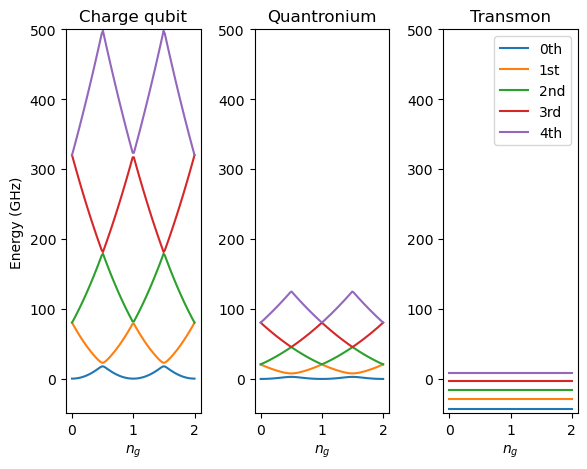

In [7]:
plt.subplot(1,3,1)
plt.plot(ng_list,hcq1)
plt.plot(ng_list,hcq2)
plt.plot(ng_list,hcq3)
plt.plot(ng_list,hcq4)
plt.plot(ng_list,hcq5)
plt.ylim(-50,500)
plt.title("Charge qubit")
plt.ylabel("Energy (GHz)")
plt.xlabel(r'$n_g$')
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)


plt.subplot(1,3,2)
plt.plot(ng_list,hqu1)
plt.plot(ng_list,hqu2)
plt.plot(ng_list,hqu3)
plt.plot(ng_list,hqu4)
plt.plot(ng_list,hqu5)
plt.ylim(-50,500)
plt.title("Quantronium")
plt.xlabel(r'$n_g$')

plt.subplot(1,3,3)
plt.plot(ng_list,htr1)
plt.plot(ng_list,htr2)
plt.plot(ng_list,htr3)
plt.plot(ng_list,htr4)
plt.plot(ng_list,htr5)
plt.ylim(-50,500)
plt.title("Transmon")
plt.xlabel(r'$n_g$')
plt.legend(["0th","1st","2nd","3rd","4th"])

### 1e) 

Text(0, 0.5, '0->1 Transition energy (GHz)')

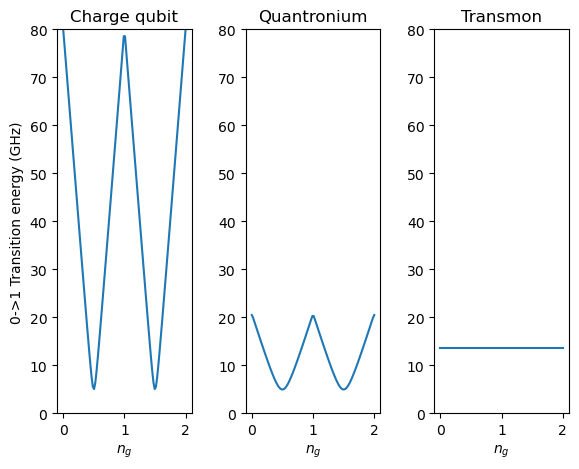

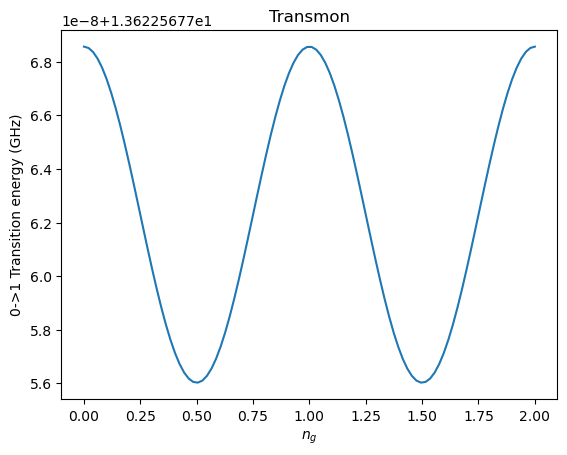

In [8]:
E01cq = hcq2-hcq1
E01qu = hqu2-hqu1
E01tr = htr2-htr1

plt.subplot(1,3,1)
plt.plot(ng_list,E01cq)
plt.ylim(0,80)
plt.title("Charge qubit")
plt.ylabel("0->1 Transition energy (GHz)")
plt.xlabel(r'$n_g$')
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)


plt.subplot(1,3,2)
plt.plot(ng_list,E01qu)
plt.ylim(0,80)
plt.title("Quantronium")
plt.xlabel(r'$n_g$')

plt.subplot(1,3,3)
plt.plot(ng_list,E01tr)
plt.ylim(0,80)
plt.title("Transmon")
plt.xlabel(r'$n_g$')

#clearer view of transmon
plt.figure()
plt.plot(ng_list,E01tr)
plt.title("Transmon")
plt.xlabel(r'$n_g$')
plt.ylabel("0->1 Transition energy (GHz)")

### 1f) 

Text(0, 0.5, 'Anharmonicity (GHz)')

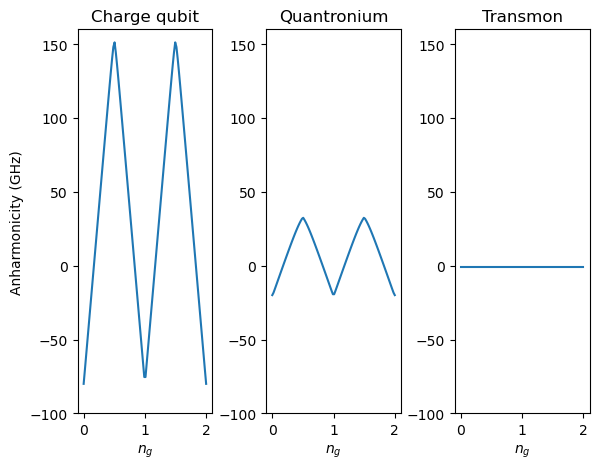

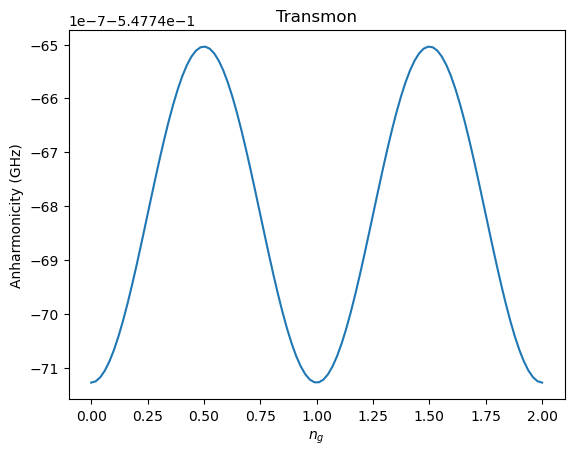

In [9]:
E12cq = hcq3-hcq2
E12qu = hqu3-hqu2
E12tr = htr3-htr2
ancq = E12cq-E01cq
anqu = E12qu-E01qu
antr = E12tr-E01tr

plt.subplot(1,3,1)
plt.plot(ng_list,ancq)
plt.ylim(-100,160)
plt.title("Charge qubit")
plt.ylabel("Anharmonicity (GHz)")
plt.xlabel(r'$n_g$')
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)


plt.subplot(1,3,2)
plt.plot(ng_list,anqu)
plt.ylim(-100,160)
plt.title("Quantronium")
plt.xlabel(r'$n_g$')

plt.subplot(1,3,3)
plt.plot(ng_list,antr)
plt.ylim(-100,160)
plt.title("Transmon")
plt.xlabel(r'$n_g$')

#clearer view of transmon
plt.figure()
plt.plot(ng_list,antr)
plt.title("Transmon")
plt.xlabel(r'$n_g$')
plt.ylabel("Anharmonicity (GHz)")

### 1g) 

In [10]:
def dip_matrix_cq(n_g):
    bra0 = H_tot(20,5,20,n_g)[1][0].dag()
    n=n_op(20)
    ket1 = H_tot(20,5,20,n_g)[1][1]
    return np.abs(np.real((bra0*n*ket1)[0][0][0]))

def dip_matrix_qu(n_g):
    bra0 = H_tot(5,5,20,n_g)[1][0].dag()
    n=n_op(20)
    ket1 = H_tot(5,5,20,n_g)[1][1]
    return np.abs(np.real((bra0*n*ket1)[0][0][0]))

def dip_matrix_tr(n_g):
    bra0 = H_tot(0.5,50,30,n_g)[1][0].dag()
    n=n_op(30)
    ket1 = H_tot(0.5,50,30,n_g)[1][1]
    return np.abs(np.real((bra0*n*ket1)[0][0][0]))

ng_list = np.linspace(0,1,50)
dipcq = np.vectorize(dip_matrix_cq)
dipqu = np.vectorize(dip_matrix_qu)
diptr = np.vectorize(dip_matrix_tr)

dipcq_list = dipcq(ng_list)
dipqu_list = dipqu(ng_list)
diptr_list = diptr(ng_list)

Text(0.5, 0, '$n_g$')

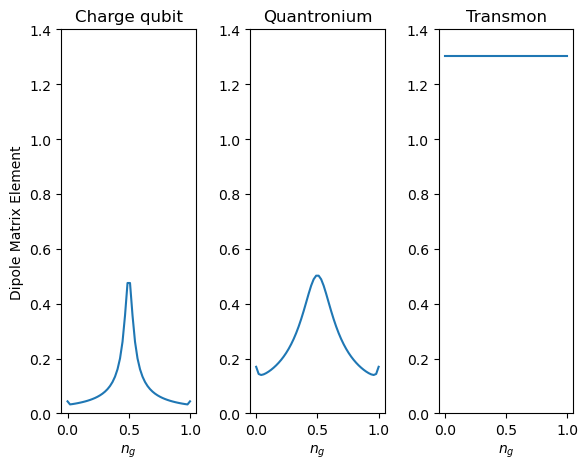

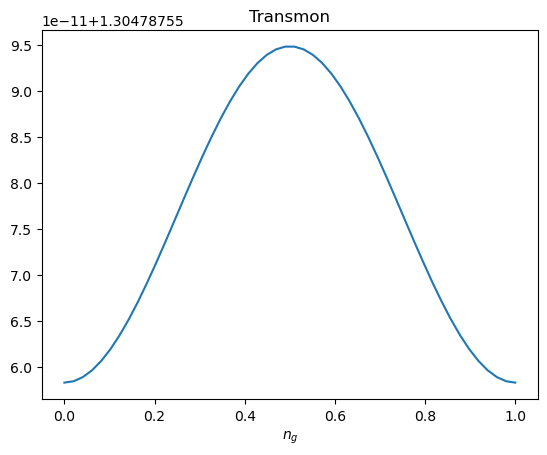

In [12]:
plt.subplot(1,3,1)
plt.plot(ng_list,dipcq_list)
plt.ylim(0,1.4)
plt.title("Charge qubit")
plt.ylabel("Dipole Matrix Element")
plt.xlabel(r'$n_g$')
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)


plt.subplot(1,3,2)
plt.plot(ng_list,dipqu_list)
plt.ylim(0,1.4)
plt.title("Quantronium")
plt.xlabel(r'$n_g$')

plt.subplot(1,3,3)
plt.plot(ng_list,diptr_list)
plt.ylim(0,1.4)
plt.title("Transmon")
plt.xlabel(r'$n_g$')

#clearer view of transmon
plt.figure()
plt.plot(ng_list,diptr_list)
plt.title("Transmon")
plt.xlabel(r'$n_g$')
#plt.ylabel("Anharmonicity (GHz)")

### 1h) 

In [13]:
E_C = np.linspace(0.5,50,500)
E_J = 25/8/E_C
Ej_Ec = E_J/E_C

def H_e(ec,ej,i,j,n_g):
    return H_tot(ec,ej,10,n_g)[j][i]

he = np.vectorize(H_e)

Text(0, 0.5, 'Transition Energy (GHz)')

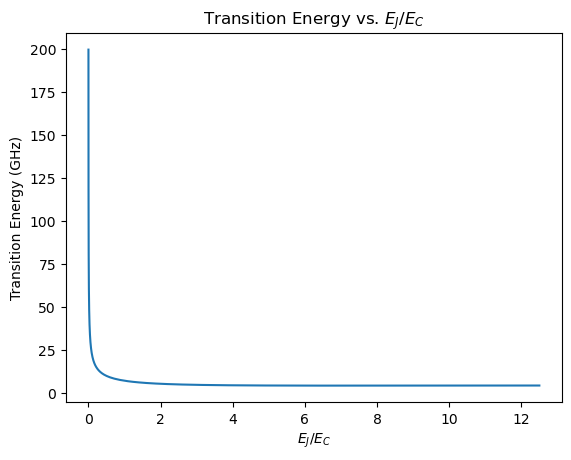

In [14]:
#E01
e01 = he(E_C,E_J,1,0,0.001)-he(E_C,E_J,0,0,0.001)
plt.plot(Ej_Ec,e01)
plt.title(r'Transition Energy vs. $E_J/E_C$')
plt.xlabel(r'$E_J/E_C$')
plt.ylabel("Transition Energy (GHz)")

Text(0, 0.5, 'Dipole Matrix Element')

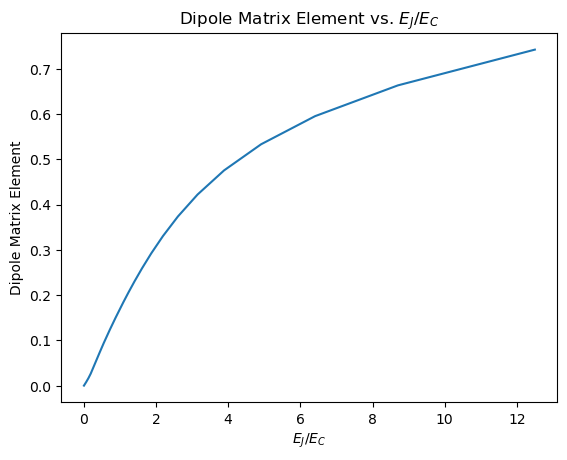

In [16]:
#dipole matrix
def dip(Ec,Ej):
    return np.abs(np.real((Qobj(he(Ec,Ej,0,1,0.001)).dag()*n_op(10)*Qobj(he(Ec,Ej,1,1,0.001)))[0][0][0]))
dipole = np.vectorize(dip)
plt.plot(Ej_Ec,dipole(E_C,E_J))
plt.title(r'Dipole Matrix Element vs. $E_J/E_C$')
plt.xlabel(r'$E_J/E_C$')
plt.ylabel("Dipole Matrix Element")

Text(0, 0.5, 'Anharmonicity (GHz)')

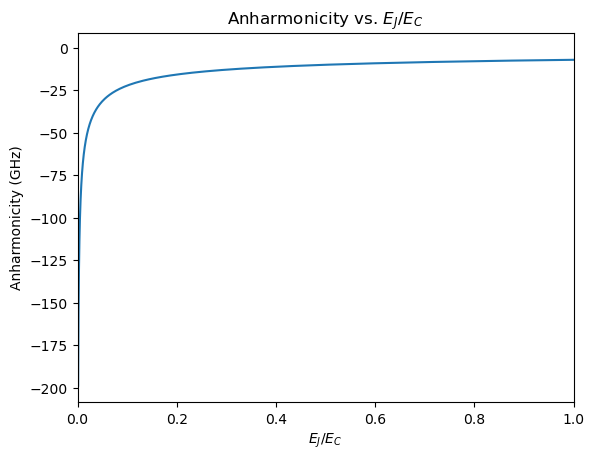

In [201]:
#anharmonicity
anharm = he(E_C,E_J,2,0,0.001)-he(E_C,E_J,1,0,0.001)-e01
plt.plot(Ej_Ec,anharm)
plt.xlim(0,1)
plt.title(r'Anharmonicity vs. $E_J/E_C$')
plt.xlabel(r'$E_J/E_C$')
plt.ylabel("Anharmonicity (GHz)")

Text(0, 0.5, 'Band Dispersion (GHz)')

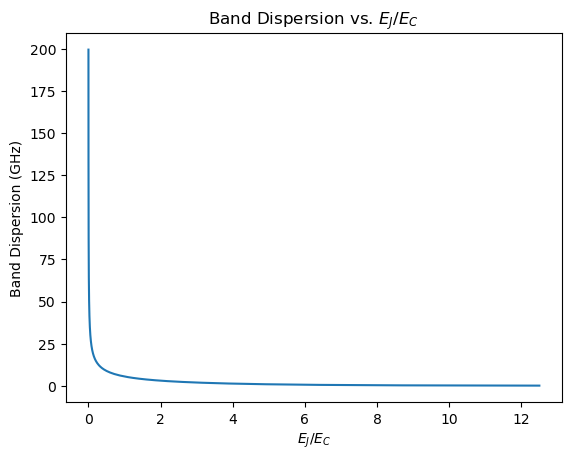

In [202]:
#band dispersion
banddisp = e01-he(E_C,E_J,1,0,0.5)+he(E_C,E_J,0,0,0.5)
plt.plot(Ej_Ec,banddisp)
plt.title(r'Band Dispersion vs. $E_J/E_C$')
plt.xlabel(r'$E_J/E_C$')
plt.ylabel("Band Dispersion (GHz)")

## Problem 2 - Let's prepare a cat state!

### 2.3 

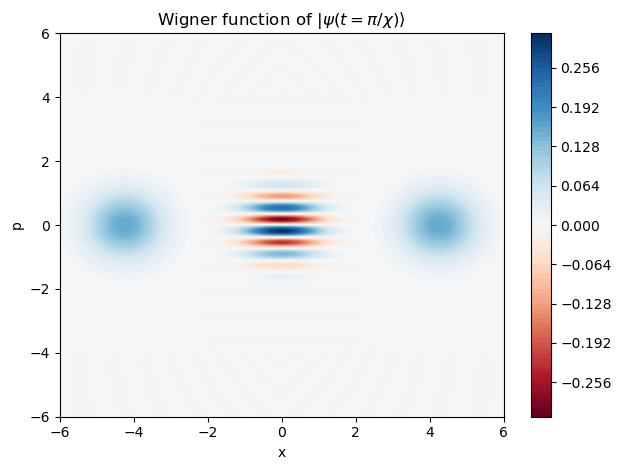

In [19]:
dim_c = 40
alpha = 3

a_op = destroy(dim_c)
adag_op = a_op.dag()
n_op = num(dim_c)

#t=pi/chi
psi = (coherent(dim_c,3) + 1j*coherent(dim_c,-3)).unit()
psi=psi_t(np.pi,3)

xvec = np.linspace(-6,6,300)
W = wigner(psi, xvec, xvec)

wmap = wigner_cmap(W)  # Generate Wigner colormap
nrm = mpl.colors.Normalize(-W.max(), W.max())
plt.contourf(xvec, xvec, W, 100, cmap=cm.RdBu, norm=nrm)
plt.colorbar()
plt.xlabel('x')
plt.ylabel('p')
plt.title(r'Wigner function of $|\psi(t=\pi/\chi)\rangle$')
plt.tight_layout()

### 2.4 

In [21]:
def psi_t(t,alpha):
    summation = 0
    for n in range(0,dim_c):
        summation += alpha**n/factorial(n)**(1/2)*(np.cos(n**2*t/2)-1j*np.sin(n**2*t/2))*fock(dim_c,n)
    return np.exp(-alpha**2/2)*summation

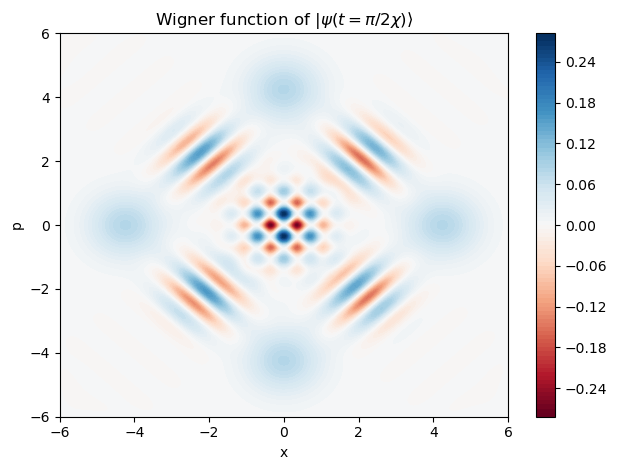

In [43]:
psi = psi_t(np.pi/2,3)
xvec = np.linspace(-6,6,300)
W = wigner(psi, xvec, xvec)

wmap = wigner_cmap(W)  # Generate Wigner colormap
nrm = mpl.colors.Normalize(-W.max(), W.max())
plt.contourf(xvec, xvec, W, 100, cmap=cm.RdBu, norm=nrm)
plt.colorbar()
plt.xlabel('x')
plt.ylabel('p')
plt.title(r'Wigner function of $|\psi(t=\pi/2\chi)\rangle$')
plt.tight_layout()

### 2.5 

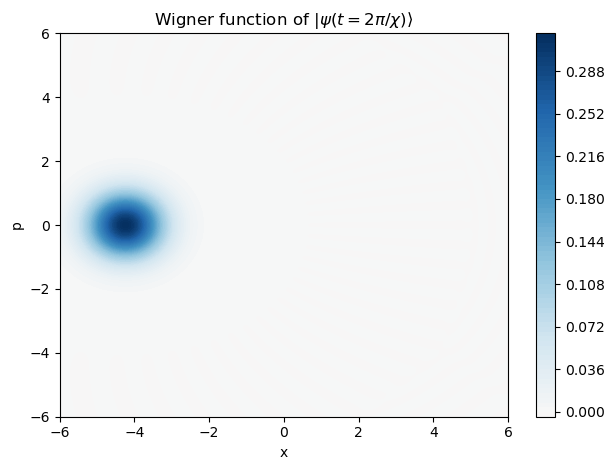

In [45]:
#to return to coherent state, need either the cos term to be 0
#can set t to 2pi for this
psi = psi_t(np.pi*2,3)
xvec = np.linspace(-6,6,300)
W = wigner(psi, xvec, xvec)

wmap = wigner_cmap(W)  # Generate Wigner colormap
nrm = mpl.colors.Normalize(-W.max(), W.max())
plt.contourf(xvec, xvec, W, 100, cmap=cm.RdBu, norm=nrm)
plt.colorbar()
plt.xlabel('x')
plt.ylabel('p')
plt.title(r'Wigner function of $|\psi(t=2\pi/\chi)\rangle$')
plt.tight_layout()

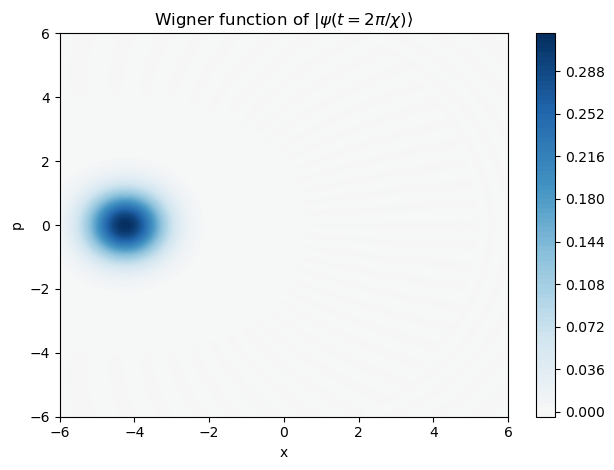

In [48]:
#plot coherent state (-3) to check that it matches
psi = coherent(dim_c,-3)
xvec = np.linspace(-6,6,300)
W = wigner(psi, xvec, xvec)

wmap = wigner_cmap(W)  # Generate Wigner colormap
nrm = mpl.colors.Normalize(-W.max(), W.max())
plt.contourf(xvec, xvec, W, 100, cmap=cm.RdBu, norm=nrm)
plt.colorbar()
plt.xlabel('x')
plt.ylabel('p')
plt.title(r'Wigner function of $|\psi(t=2\pi/\chi)\rangle$')
plt.tight_layout()